In [1]:
# Visualization Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import image
from IPython.display import Image, SVG
import seaborn as sns

# Filepaths, Numpy, Tensorflow
import os
import numpy as np
import tensorflow as tf

# Keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

Using TensorFlow backend.


In [2]:
from PIL import Image
import glob
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tqdm import tqdm

files = glob.glob("imageData/imPencil/*.jpg")

train = []
for infile in tqdm(files):
    img = image.load_img(infile, target_size=(28,28), grayscale=False)
    img = img.getdata()
    img = image.img_to_array(img)
    img = img/255
    train.append(img)
X = np.array(train)

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 75.28it/s]


In [3]:
print(X.shape)

(26, 784, 3, 1)


In [4]:
X = X.reshape(26,2352)

In [5]:
from keras.utils import to_categorical
y = X.shape[0]
y = y - 1
y = to_categorical(y)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = Sequential()
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(26, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
20/20 [==============================] - 1s 25ms/sample - loss: 4.2617 - acc: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 0s 1ms/sample - loss: 5.2264 - acc: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 0s 2ms/sample - loss: 6.0406 - acc: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 0s 930us/sample - loss: 5.6812 - acc: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 0s 980us/sample - loss: 5.5609 - acc: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 0s 1ms/sample - loss: 4.9381 - acc: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 0s 2ms/sample - loss: 4.7118 - acc: 0.4500
Epoch 8/10
20/20 [==============================] - 0s 1ms/sample - loss: 4.8401 - acc: 0.0000e+00
Epoch 9/10
20/20 [==============================] - 0s 1ms/sample - loss: 4.7272 - acc: 0.0000e+00
Epoch 10/10
20/20 [==============================] - 0s 1ms/sample - loss: 5.0820 - acc: 0.0000e+00


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1176500   
_________________________________________________________________
dense_1 (Dense)              multiple                  250500    
_________________________________________________________________
dense_2 (Dense)              multiple                  13026     
Total params: 1,440,026
Trainable params: 1,440,026
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.save("marker_self_trained.h5")

In [13]:
# Load Model
from tensorflow.keras.models import load_model
model = load_model("marker_self_trained.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
# Evaluate Model
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - loss: 0.0000e+00 - acc: 0.1667
Loss: 0.0, Accuracy: 0.1666666716337204


In [16]:
test = np.expand_dims(X_train[9], axis=0)
test.shape

(1, 2352)

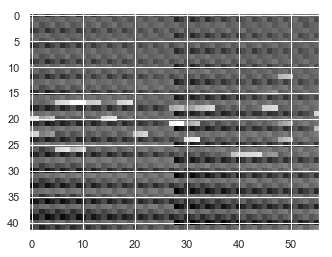

In [17]:
plt.imshow(scaler.inverse_transform(test).reshape(42,56), cmap=plt.cm.Greys)

In [18]:
model.predict_classes(test)

array([1], dtype=int64)